# Table of content

[Importing libraries, settings, and data](#import)

[Exploring Relationships](#explore)

- [Correlations](#correlations)
- [Scatterplots](#scatter)
- [Pair Plots](#pair)
- [Categorical Plots](#categorical)

<a id='import'></a>
# Importing libraries, settings, and data

[Back to top](#top)

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

In [4]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data\Data Prepared' #creating a path

In [5]:
df=pd.read_pickle(os.path.join(path,'merged_data.pkl')) #importing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133848 entries, 0 to 133847
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso                      133848 non-null  object        
 1   date                     133848 non-null  datetime64[ns]
 2   category                 133848 non-null  object        
 3   currency                 133848 non-null  object        
 4   product_name             133848 non-null  object        
 5   price_unit               133848 non-null  float64       
 6   usdprice_unit            133848 non-null  float64       
 7   year                     133848 non-null  int64         
 8   month                    133848 non-null  object        
 9   population               111986 non-null  float64       
 10  millions_undernourished  95376 non-null   float64       
 11  country                  133848 non-null  object        
 12  earnings_currenc

In [7]:
df.head(50)

,iso,date,category,currency,product_name,price_unit,usdprice_unit,year,month,population,...,country,earnings_currency,inflation,gdp_pcapita,affordability_index,%_undernourished,base_price,price_index,basket_size,%_annual_growth
0,AFG,2000-01-15,cereals and tubers,AFN,Bread,15.250000,0.325925,2000,01,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,23.033184,9,16.56
1,AFG,2000-02-15,cereals and tubers,AFN,Bread,15.300000,0.324425,2000,02,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,23.108702,9,16.56
2,AFG,2000-03-15,cereals and tubers,AFN,Bread,14.752500,0.311300,2000,03,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,22.281773,9,16.56
3,AFG,2000-04-15,cereals and tubers,AFN,Bread,17.195000,0.363775,2000,04,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,25.970859,9,16.56
4,AFG,2000-05-15,cereals and tubers,AFN,Bread,18.277500,0.386675,2000,05,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,27.605837,9,16.56
5,AFG,2000-06-15,cereals and tubers,AFN,Bread,18.692500,0.395475,2000,06,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,28.232642,9,16.56
6,AFG,2000-07-15,cereals and tubers,AFN,Bread,19.217500,0.405575,2000,07,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,29.025587,9,16.56
7,AFG,2000-08-15,cereals and tubers,AFN,Bread,16.850000,0.354700,2000,08,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,25.449780,9,16.56
8,AFG,2000-09-15,cereals and tubers,AFN,Bread,17.940000,0.377625,2000,09,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,27.096086,9,16.56
9,AFG,2000-10-15,cereals and tubers,AFN,Bread,17.527500,0.368950,2000,10,NaN,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,66.208824,26.473058,9,16.56


<a id='explore'></a>
# Exploring Relationships

[Back to top](#top)

<a id='correlations'></a>
## Correlations

[Back to top](#top)

In [8]:
# Choosing variables that I will check for correlation

df.columns.to_list() #creating a full list of variables

['iso',
 'date',
 'category',
 'currency',
 'product_name',
 'price_unit',
 'usdprice_unit',
 'year',
 'month',
 'population',
 'millions_undernourished',
 'country',
 'earnings_currency',
 'inflation',
 'gdp_pcapita',
 'affordability_index',
 '%_undernourished',
 'base_price',
 'price_index',
 'basket_size',
 '%_annual_growth']

In [9]:
var_list=['usdprice_unit', # I'm not including unit price and earnings in local currency, since their values differ across the dataframe
          'population',
          'inflation',
          'gdp_pcapita',
         'affordability_index',
         '%_undernourished',
         'price_index',
         'basket_size',
         '%_annual_growth'] 

In [10]:
df_relate=df[var_list] #Isolating the variables I want to look at

In [11]:
df_relate.corr() # creating a correlation matrix

,usdprice_unit,population,inflation,gdp_pcapita,affordability_index,%_undernourished,price_index,basket_size,%_annual_growth
usdprice_unit,1.000000,-0.004332,0.025148,-0.007915,-0.027618,0.053281,0.169401,-0.012237,-0.000090
population,-0.004332,1.000000,-0.011046,-0.010141,-0.022802,-0.095833,-0.010482,-0.078371,-0.001725
inflation,0.025148,-0.011046,1.000000,-0.016410,0.150053,0.077703,-0.031269,0.012268,0.074762
gdp_pcapita,-0.007915,-0.010141,-0.016410,1.000000,0.037028,-0.379969,-0.009043,-0.131461,-0.002357
affordability_index,-0.027618,-0.022802,0.150053,0.037028,1.000000,-0.057008,-0.068751,-0.105257,-0.000141
%_undernourished,0.053281,-0.095833,0.077703,-0.379969,-0.057008,1.000000,0.107141,-0.013143,0.012366
price_index,0.169401,-0.010482,-0.031269,-0.009043,-0.068751,0.107141,1.000000,-0.017379,0.012712
basket_size,-0.012237,-0.078371,0.012268,-0.131461,-0.105257,-0.013143,-0.017379,1.000000,-0.002750
%_annual_growth,-0.000090,-0.001725,0.074762,-0.002357,-0.000141,0.012366,0.012712,-0.002750,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

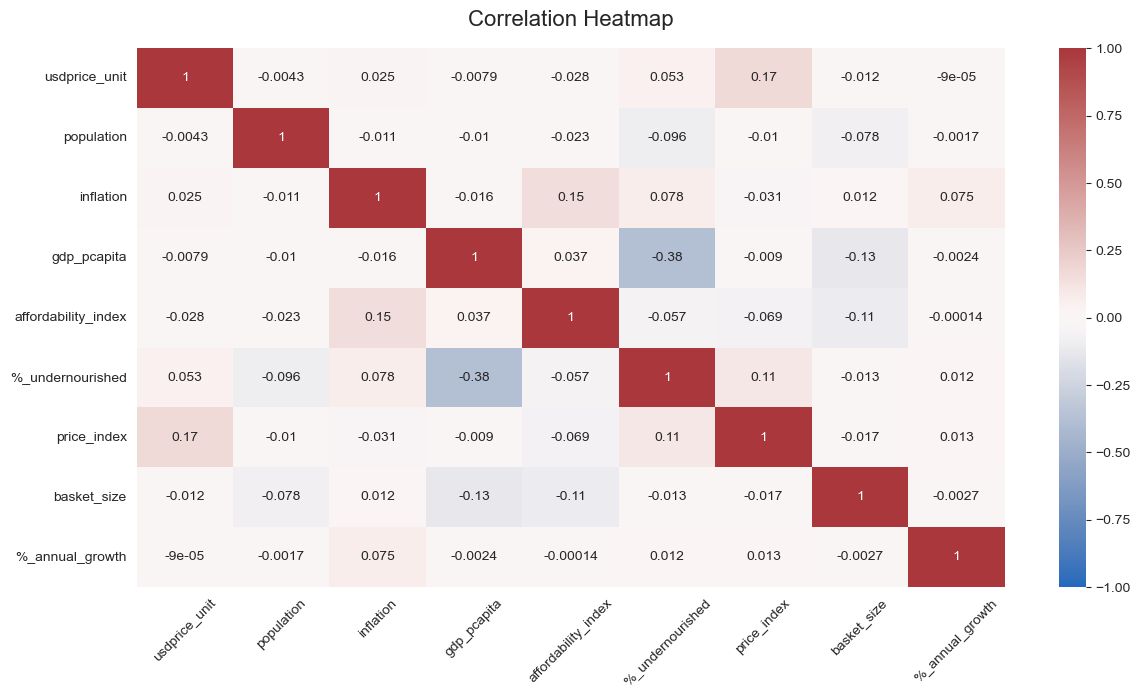

In [12]:
# Creating a heatmap. I'm using a contrast color map to draw attention to the darkest areas representing stronger negative or positive correlation

heatmap = sns.heatmap(df_relate.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=45)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

In [13]:
# I want to crete a triangle heatmap using mask argument

np.triu(np.ones_like(df_relate.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
# Defining the mask I will use

mask = np.triu(np.ones_like(df_relate.corr(), dtype=bool))

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

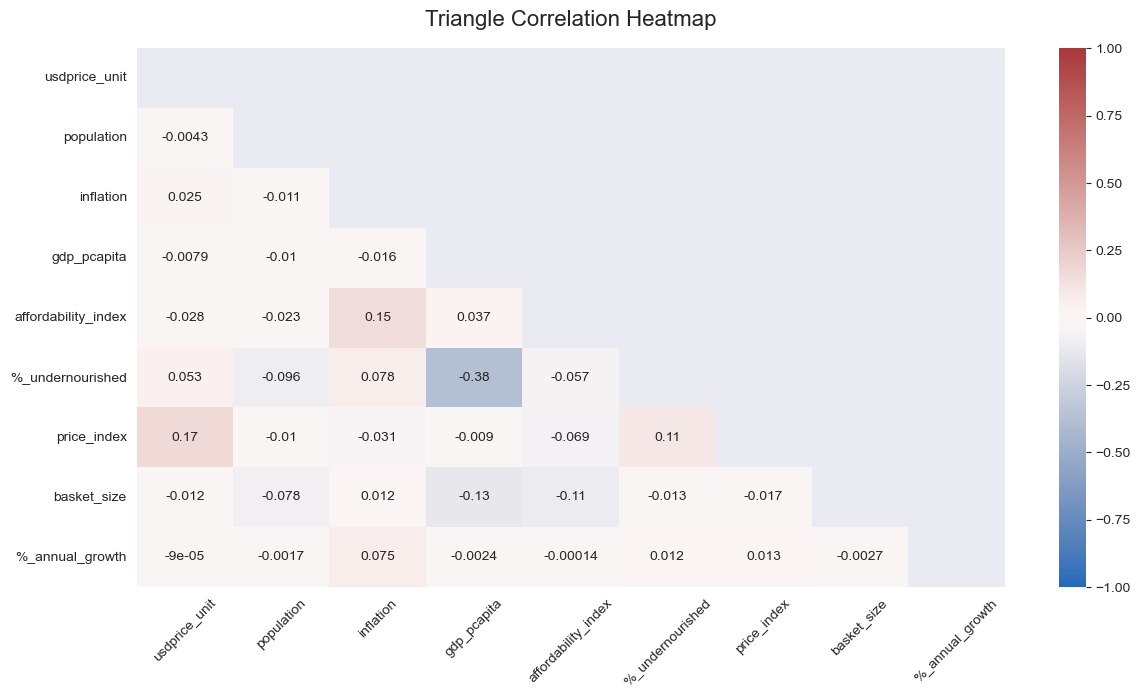

In [15]:
# Creating a heatmap 
sns.set_style("dark")
heatmap_triangle = sns.heatmap(df_relate.corr(), vmin=-1, vmax=1, mask=mask, annot=True, cmap='vlag')
heatmap_triangle.set_xticklabels(heatmap_triangle.get_xticklabels(),rotation=45)
heatmap_triangle.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

Considering that the data covers different countries, currencies, and products, I would be surprised to see perfect linear relationships between variables. In this context, I consider even normally weak correlation (around 0.1) to be worth noting.

The strongest negative correlation is between the gdp per capita and rate of undernourished people in a country.
Positive correlation can be observed between affordability index and inflation, which is surprising. 
I can also note the relationship between unit price and price index, price index and the percentage of undernourished people in a country.
I'm also noting the negative relationship between a basket size and gdp per capita, as well as well as the basket size and the afordability index. That seems to contradict my assumption that the poorest countries have the lowest number of products included in the UN WFP monitoring.  

<a id='scatter'></a>
## Scatterplots

[Back to top](#top)

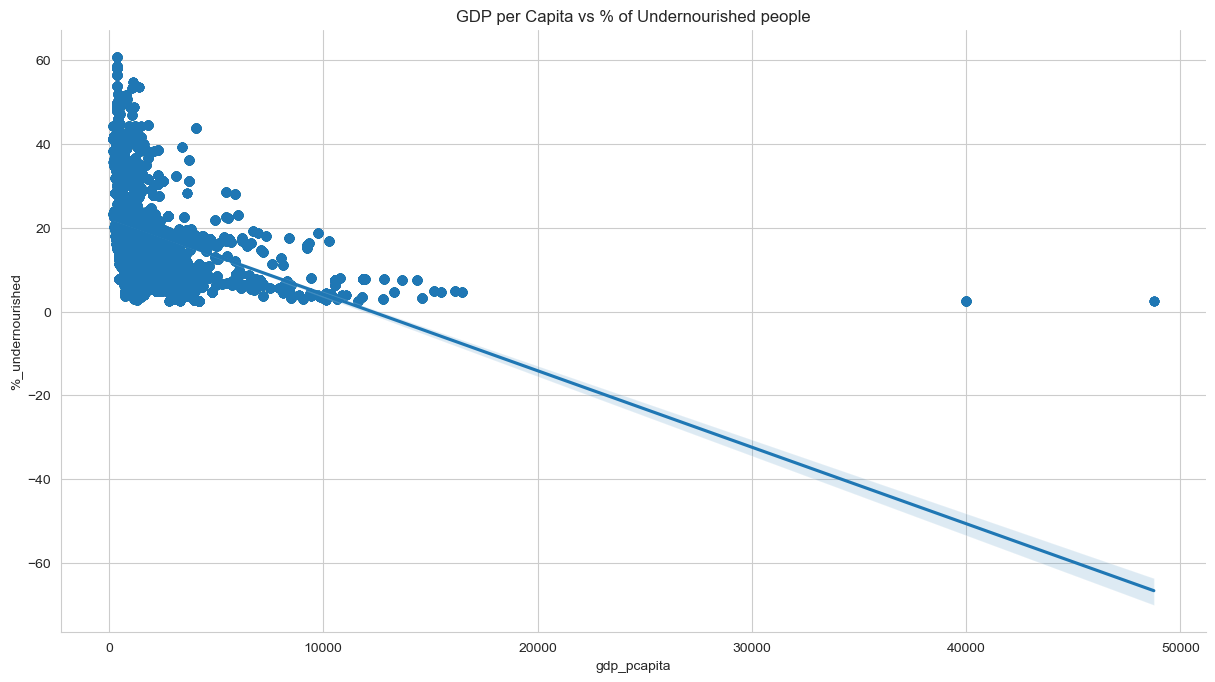

In [16]:
# Creating scatterplot to explore gdp per capita and rate of undernourished people in a country

sns.set_style('whitegrid')
scatter_gdp_undernourished=sns.lmplot(x = 'gdp_pcapita', y = '%_undernourished', data = df_relate, markers='o', palette='deep')
scatter_gdp_undernourished.fig.set_figwidth(14)
scatter_gdp_undernourished.fig.set_figheight(7)
scatter_gdp_undernourished.set(title='GDP per Capita vs % of Undernourished people')

The scatterplot clearly shows that the highest percentage of undernourished people is observed in countries with lower GDP per capita values.

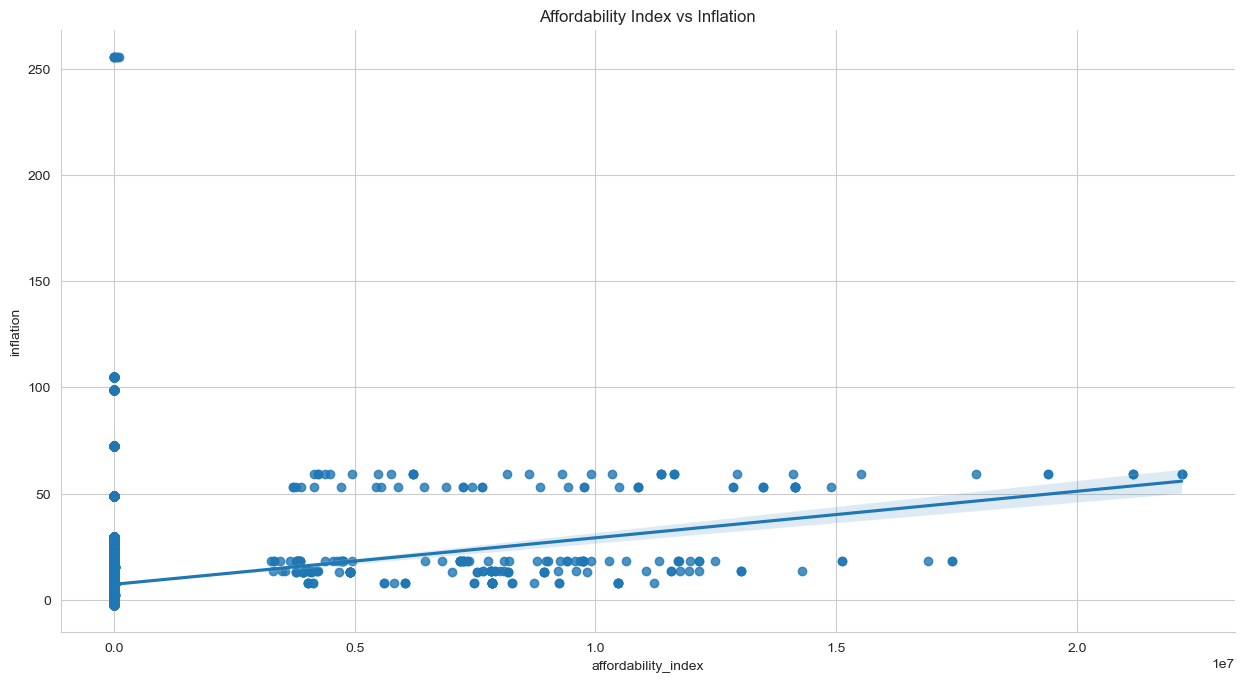

In [17]:
# Creating scatterplot to explore affordability index and inflation

scatter_afford_inflation=sns.lmplot(x ='affordability_index', y ='inflation',data=df_relate, palette="deep")
scatter_afford_inflation.set(title='Affordability Index vs Inflation')
scatter_afford_inflation.fig.set_figwidth(14)
scatter_afford_inflation.fig.set_figheight(7)

It seems unlikely that food affordability will increase along with the inflation rate. I would expect the values to correlate otherwise. However, the scatterplot clearly shows that countries with extremely high inflation have very low food affordability.

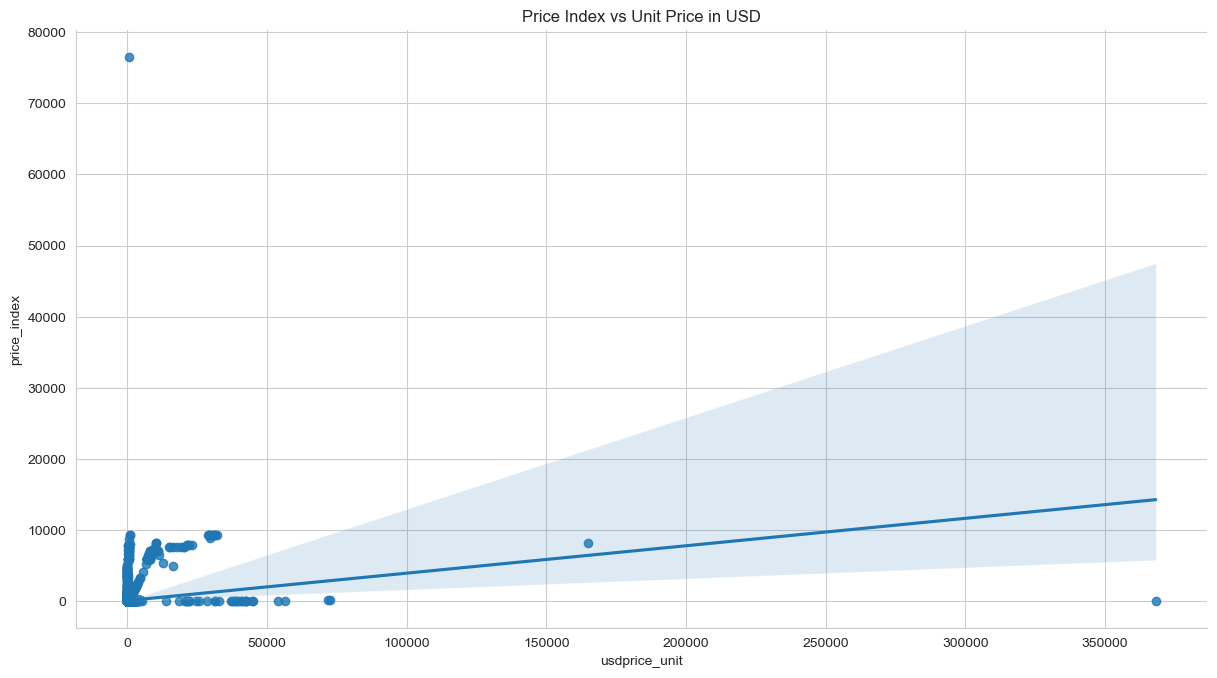

In [18]:
# Creating scatterplot to explore price index and unit price in USD

scatter_price_index=sns.lmplot(x ='usdprice_unit', y ='price_index',data=df_relate, palette="deep")
scatter_price_index.set(title='Price Index vs Unit Price in USD')
scatter_price_index.fig.set_figwidth(14)
scatter_price_index.fig.set_figheight(7)

This scatterplot clearly shows that I will need to pay attention to the outliers. It looks like one extremely high price is affecting the visualization. It is also clear that a higher unit price is associated with a higher price index. I expect this relationship to become even more clear once I handle the outliers.

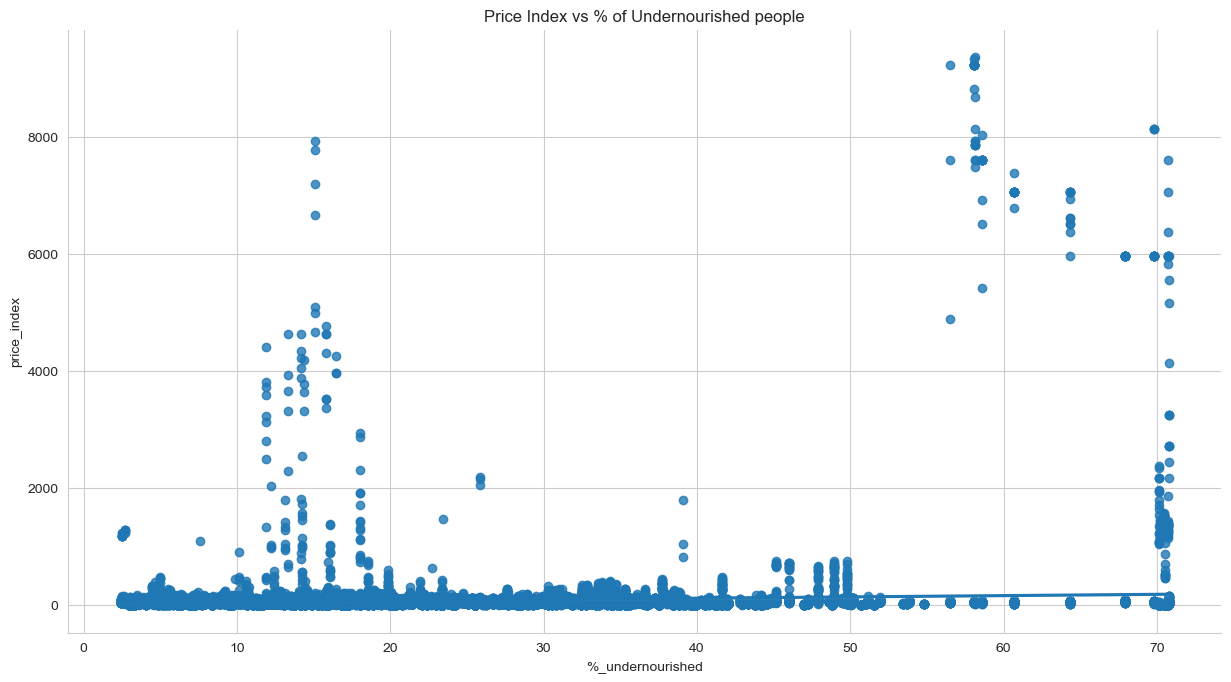

In [19]:
# Creating scatterplot to explore price index and percentage of undernourished people 

scatter_price_under=sns.lmplot(x ='%_undernourished', y ='price_index',data=df_relate, palette="deep")
scatter_price_under.set(title='Price Index vs % of Undernourished people')
scatter_price_under.fig.set_figwidth(14)
scatter_price_under.fig.set_figheight(7)

Though the correlation between the variables is weak, the scatterplot clearly shows that the highest price index is associated with a high percentage of undernourished people.

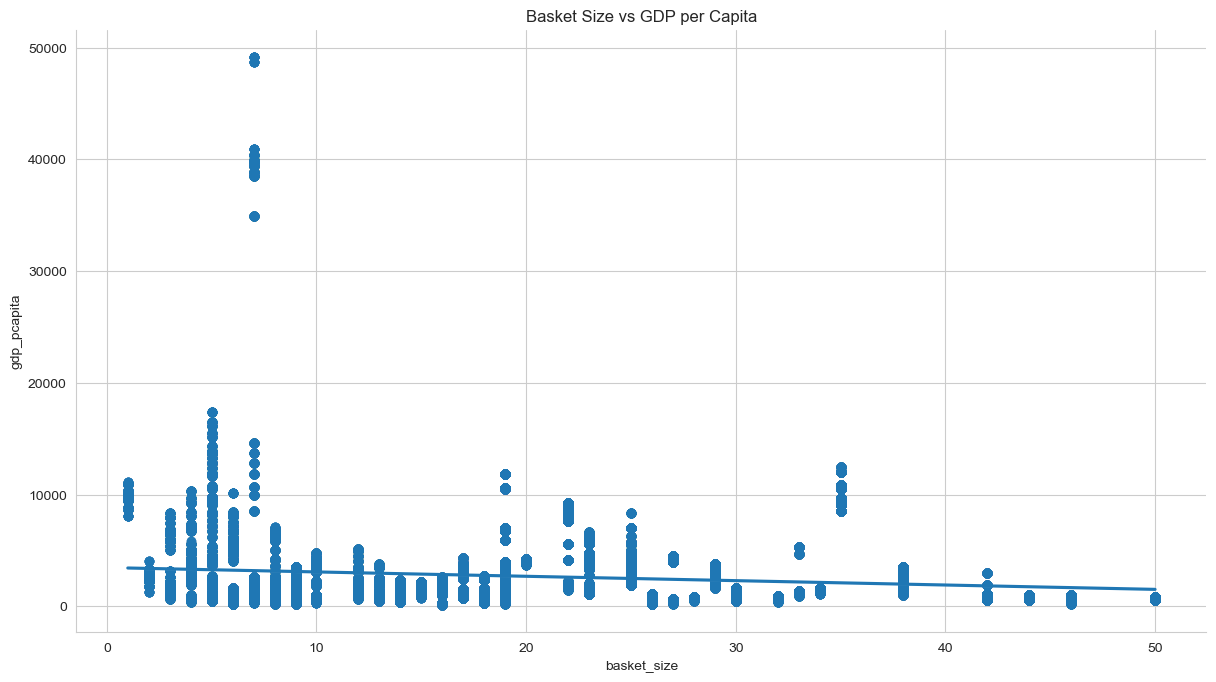

In [20]:
# Creating scatterplot to explore basket size and gdp per capita

scatter_basket_gdp=sns.lmplot(x ='basket_size', y ='gdp_pcapita',data=df_relate, palette="deep")
scatter_basket_gdp.set(title='Basket Size vs GDP per Capita')
scatter_basket_gdp.fig.set_figwidth(14)
scatter_basket_gdp.fig.set_figheight(7)

The scatterplot demonstrates that most of the values are associated with relatively low GDP per capita. The countries with the largest basket size also have low GDP per capita. That contradicts my expectation that warmer countries have a larger basket size.

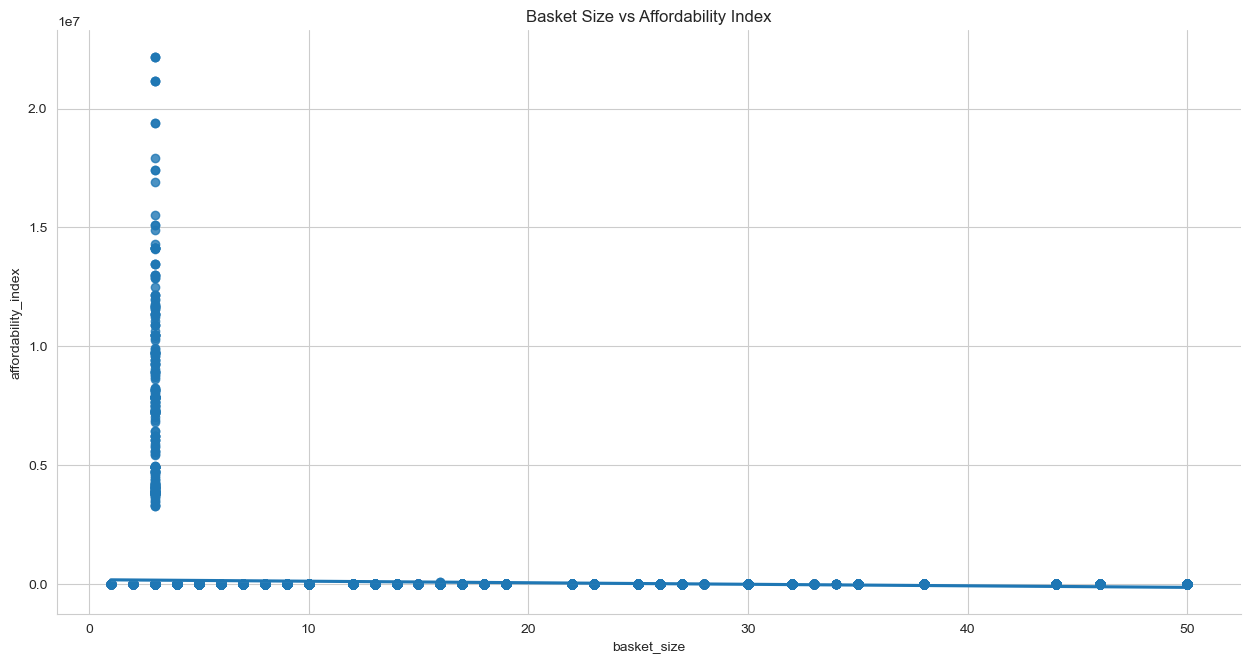

In [21]:
# Creating scatterplot to explore basket size and afordability index

scatter_basket_afford=sns.lmplot(x ='basket_size', y ='affordability_index',data=df_relate, palette="deep")
scatter_basket_afford.set(title='Basket Size vs Affordability Index')
scatter_basket_afford.fig.set_figwidth(14)
scatter_basket_afford.fig.set_figheight(7)

It seems that the highest affordability values are asociated with a relatively small basket size. 

<a id='pair'></a>
## Pair Plots

[Back to top](#top)

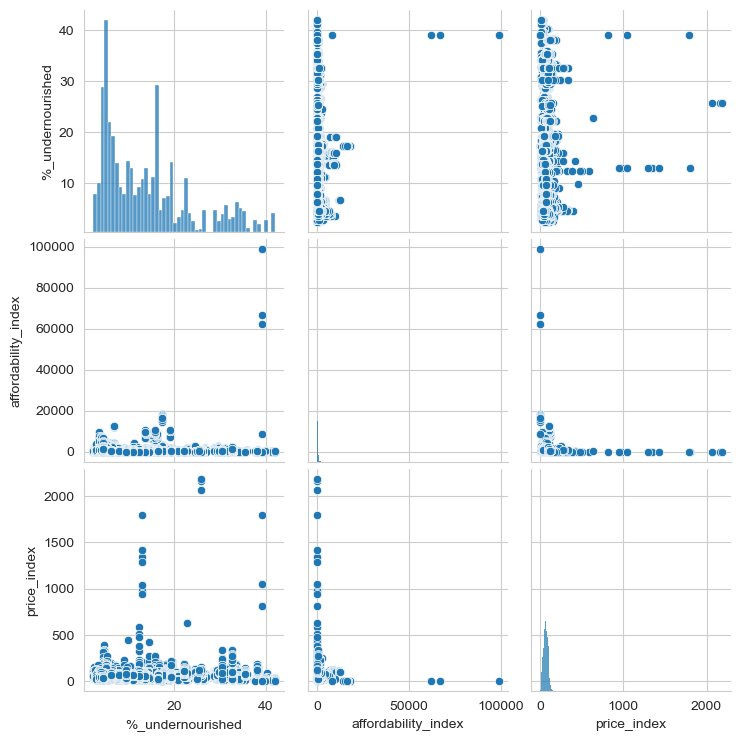

In [22]:
# Creating a pairplot

pair=sns.pairplot(df_relate[['%_undernourished','affordability_index','price_index']].dropna())

Unfortunately, when I try including more variables in the pairplot, the notebool keeps crashing. But I will definitely use this visualization in further analysis. It gives me a great overview of data distribution and highlights the need to check the data for outliers. I can see that for the price-related variables, the highest volume of data is concentrated in the lower spectrum. It makes sense since most of the products are everyday foods with relatively low prices. But I can clearly see that a couple of extremely high values might be affecting the analysis.
Upon examining the relationships among variables, I have chosen to delve into a regional-level analysis of the data as well. This approach allows for a more nuanced examination, as certain relationships may become more clear within specific regions that share similar cultural and social contexts.

<a id='categorical'></a>
## Categorical Plots

[Back to top](#top)

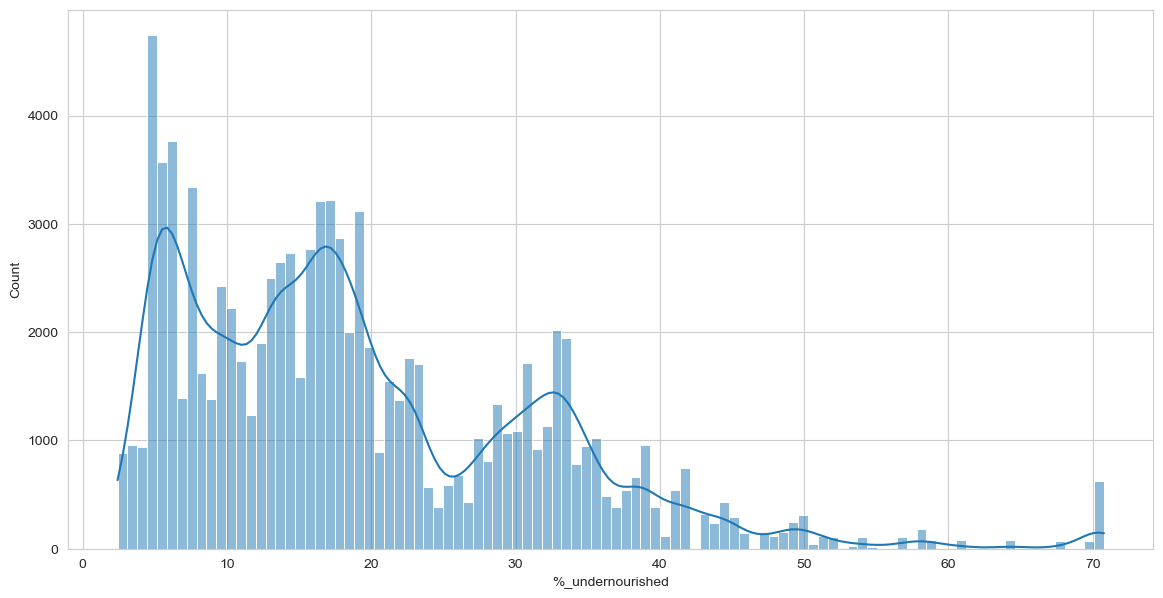

In [23]:
# Using a histogram to analyze distribution of the values in % of undernourished people

hist=sns.histplot(df_relate['%_undernourished'], bins=100, kde=True)

In [24]:
df_relate.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,usdprice_unit,population,inflation,gdp_pcapita,affordability_index,%_undernourished,price_index,basket_size,%_annual_growth
count,133848.00000,111986.00000,114121.00000,123933.00000,42007.00000,95376.00000,133848.00000,133848.00000,133848.00000
mean,26.38443,61905566.16373,8.61069,2643.48846,49874.22778,19.30623,76.71837,21.20692,225.58989
std,1320.05541,192351175.39616,23.48442,3578.16697,709957.24734,12.39959,300.33711,11.99764,32427.25822
min,0.00000,498884.00000,-8.97474,114.36701,0.47983,2.41587,0.01273,1.00000,-99.98000
25%,0.50716,6378261.00000,2.43761,756.54760,134.22998,9.62917,43.44687,12.00000,-3.45000
50%,0.91416,13146362.00000,5.17477,1484.22707,281.72805,16.79838,68.00767,19.00000,4.33000
75%,1.73260,39543154.00000,9.15032,3498.50982,545.44218,27.66788,91.09304,28.00000,19.25000
max,368229.16118,1407563842.00000,557.20182,49145.28043,22174585.71429,70.77407,76496.82717,50.00000,6166804.35000


In [25]:
# Assigning categories to countries based on the percentage of undernourished people in the population

df.loc[df['%_undernourished']<=10, 'food_security_level']='High'
df.loc[(df['%_undernourished']>10)&(df['%_undernourished']<=30), 'food_security_level']='Moderate'
df.loc[(df['%_undernourished']>30)&(df['%_undernourished']<=50), 'food_security_level']='Low'
df.loc[df['%_undernourished']>50, 'food_security_level']='Extremely low'


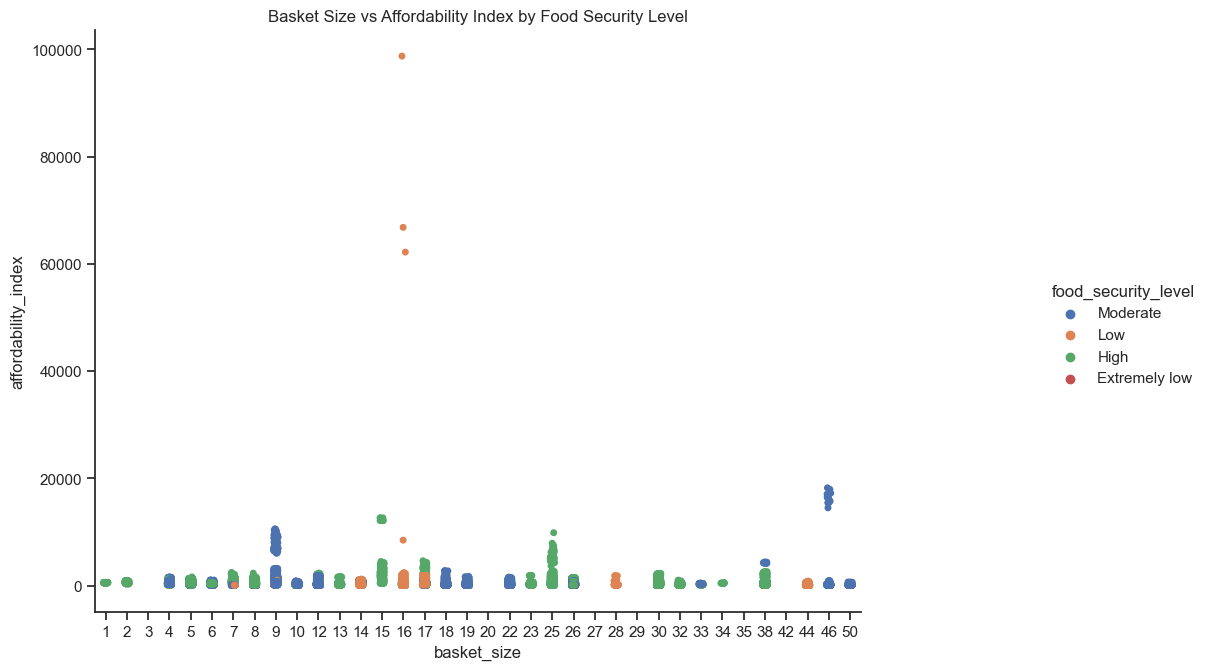

In [26]:
# Creating scatterplot to explore basket size and afordability index

sns.set(style="ticks")
hue_order=['Moderate','Low','High','Extremely low']
scatter_category=sns.catplot(x ='basket_size', y ='affordability_index',data=df, hue='food_security_level',
                             hue_order=hue_order)
scatter_category.set(title='Basket Size vs Affordability Index by Food Security Level')
scatter_category.fig.set_figwidth(14)
scatter_category.fig.set_figheight(7)

First of all, the scatterplot shows that I will need to take a closer look at extremely high affordability values. Affordability shows the number of units that can be bought for an average salary. The fact that extremely high values come from countries with low food security levels has to be further investigated.
In terms of the basket size, the scatterplot seems to contradict my assumption that the size depends on the economic situation in the country and that wealthier countries with higher food security levels have more staple foods included in the monitoring.